In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler,scale
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
train_df=pd.read_csv("titanic_train.csv",index_col="PassengerId")
test_df=pd.read_csv("titanic_test.csv",index_col="PassengerId")

In [4]:
all_df=pd.concat([train_df,test_df])

In [5]:
all_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [7]:
train_df["Age"].fillna(train_df["Age"].mean(),inplace=True)

In [8]:
for i in train_df:
    print(train_df[i].value_counts())
    print("----------------------------------------------------------------------------------------------")
    

0    549
1    342
Name: Survived, dtype: int64
----------------------------------------------------------------------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------------------------------------------------------------------------------
Bateman, Rev. Robert James             1
Fox, Mr. Stanley Hubert                1
Tomlin, Mr. Ernest Portage             1
Frolicher, Miss. Hedwig Margaritha     1
Carter, Mr. William Ernest             1
                                      ..
Simonius-Blumer, Col. Oberst Alfons    1
Markoff, Mr. Marin                     1
O'Dwyer, Miss. Ellen "Nellie"          1
Bowen, Mr. David John "Dai"            1
Moran, Mr. Daniel J                    1
Name: Name, Length: 891, dtype: int64
----------------------------------------------------------------------------------------------
male      577
female    314
Name: Sex, dtype: int64
-------------------------------------------------------------------------

In [9]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
X_train=train_df.drop(columns="Survived")
y_train=train_df["Survived"]

def divide_cat_num_data(X):
    cat_data=[]
    num_data=[]

    for i,cat in enumerate (X.dtypes):
        if cat==object:
            cat_data.append(X.iloc[:,i])
        else:
            num_data.append(X.iloc[:,i])

    cat_data=pd.DataFrame(cat_data).transpose()
    num_data=pd.DataFrame(num_data).transpose()
    return cat_data,num_data

cat_data,num_data=divide_cat_num_data(X_train)


In [11]:
cat_data=cat_data.drop(columns=["Name"])
#cat_data=cat_data.drop(columns=["Ticket"])

In [12]:
cat_data.Cabin=cat_data.Cabin.fillna("No cabin")
cat_data.Embarked=cat_data.Embarked.fillna("No data")

<AxesSubplot:>

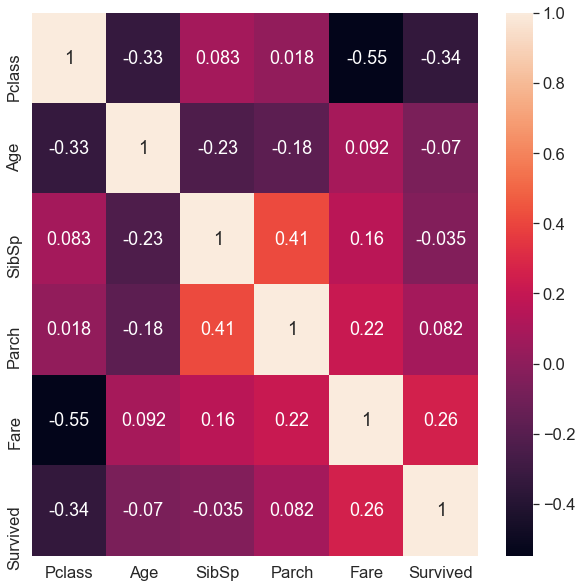

In [13]:
sns.set(rc={'figure.figsize':(10,10)},font_scale=1.5)
sns.heatmap(pd.concat([num_data,y_train,cat_data["Sex"]],axis=1).corr(),annot=True)

In [14]:
le=LabelEncoder()
cat_data_num=[]
for i in cat_data:
    cat_data_num.append(le.fit_transform(cat_data[i]))
cat_data_num=pd.DataFrame(cat_data_num).transpose()

cat_data_num.columns=cat_data.columns.values
cat_data_num.index=cat_data.index.values

In [15]:
num_data_scaled=scale(num_data)
num_data_scaled=pd.DataFrame(num_data_scaled,index=num_data.index.values,columns=num_data.columns.values)

In [16]:
X_train=pd.merge(cat_data_num,num_data_scaled,on=None,how="inner", left_index=True, right_index=True)
X_train

,Sex,Ticket,Cabin,Embarked,Pclass,Age,SibSp,Parch,Fare
1,1,523,146,3,0.827377,-5.924806e-01,0.432793,-0.473674,-0.502445
2,0,596,81,0,-1.566107,6.387890e-01,0.432793,-0.473674,0.786845
3,0,669,146,3,0.827377,-2.846632e-01,-0.474545,-0.473674,-0.488854
4,0,49,55,3,-1.566107,4.079260e-01,0.432793,-0.473674,0.420730
5,1,472,146,3,0.827377,4.079260e-01,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...
887,1,101,146,3,-0.369365,-2.077088e-01,-0.474545,-0.473674,-0.386671
888,0,14,30,3,-1.566107,-8.233437e-01,-0.474545,-0.473674,-0.044381
889,0,675,146,3,0.827377,4.374348e-15,0.432793,2.008933,-0.176263
890,1,8,60,0,-1.566107,-2.846632e-01,-0.474545,-0.473674,-0.044381


# Linear SVC

In [85]:
pipe_LSVC=Pipeline([("scaler",StandardScaler()),("LSVC",LinearSVC(max_iter=50000,C=0.5))])
scores_LSVC_le=cross_validate(pipe_LSVC,X_train,y_train)
scores_LSVC_le["test_score"].mean()

0.7912497646098802

# Gaussian NB

In [86]:
gnb = GaussianNB()
scores_gnb_ohe=cross_validate(gnb,X_train,y_train)
scores_gnb_ohe["test_score"].mean()

0.7655075010984872

# K neighbours

In [88]:
params_neigh={"n_neighbors":np.arange(1,20),
       "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
       "weights":['uniform','distance']}
grid_neigh=GridSearchCV(KNeighborsClassifier(),param_grid=params_neigh)
grid_neigh.fit(X_train,y_train)
print(grid_neigh.best_params_)
print(grid_neigh.best_estimator_)
print(grid_neigh.best_score_)

{'algorithm': 'auto', 'n_neighbors': 18, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=18, weights='distance')
0.701506496767309


# Decision Tree

In [92]:
params_tree={"criterion":["gini", "entropy"],
       "splitter":['best', 'random'],
        "max_depth":np.arange(1,20)}
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid=params_tree)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)
print(grid_tree.best_score_)

{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=12)
0.8249513527085558


# Random Forest

In [142]:
params_rfc={"rfc__criterion":["gini", "entropy"],
        "rfc__max_depth":np.arange(1,50)}

pipe_rfc=Pipeline([("scaler",StandardScaler()),("rfc",RandomForestClassifier())])

grid_rfc=GridSearchCV(pipe_rfc,param_grid=params_rfc)
grid_rfc.fit(X_train,y_train)
print(grid_rfc.best_params_)
print(grid_rfc.best_estimator_)
print(grid_rfc.best_score_)

{'rfc__criterion': 'gini', 'rfc__max_depth': 43}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rfc', RandomForestClassifier(max_depth=43))])
0.8507501098487227


# Gradient Boosting Classifier

In [129]:
params_gbc={"loss":["deviance", "exponential"],
        "subsample":np.arange(0.1,1.05,0.1),
        "criterion":['friedman_mse', 'mse', 'mae'],}
grid_gbc=GridSearchCV(GradientBoostingClassifier(),param_grid=params_gbc)
grid_gbc.fit(X_train,y_train)
print(grid_gbc.best_params_)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

{'criterion': 'mse', 'loss': 'exponential', 'subsample': 0.8}
GradientBoostingClassifier(criterion='mse', loss='exponential', subsample=0.8)
0.8384093904965162


# SVC

In [93]:
params_SVC={"SVC__C":np.arange(0.05,1,0.1),
       "SVC__kernel":["linear", "poly", "rbf", "sigmoid"],
        "SVC__degree":np.arange(1,6),
        "SVC__gamma":["scale","auto"]}

pipe_SVC=Pipeline([("scaler",StandardScaler()),("SVC",SVC())])

grid_SVC=GridSearchCV(pipe_SVC,param_grid=params_SVC)
grid_SVC.fit(X_train,y_train)
print(grid_SVC.best_params_)
print(grid_SVC.best_estimator_)
print(grid_SVC.best_score_)

{'SVC__C': 0.45000000000000007, 'SVC__degree': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=0.45000000000000007, degree=1))])
0.8237900947837549


# Predict Values for test set

In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [97]:
test_df["Age"].fillna(train_df["Age"].mean(),inplace=True)
X_test=test_df.drop(columns=["Name"])

test_cat,test_num=divide_cat_num_data(X_test)

test_cat.Cabin=test_cat.Cabin.fillna("No cabin")

test_cat_num=[]

for i in test_cat:
    test_cat_num.append(le.fit_transform(test_cat[i]))

test_cat_num=pd.DataFrame(test_cat_num).transpose()

test_cat_num.columns=test_cat.columns.values
test_cat_num.index=test_cat.index.values

test_num_scaled=scale(test_num)
test_num_scaled=pd.DataFrame(test_num_scaled,index=test_num.index.values,columns=test_num.columns.values)

X_test=pd.merge(test_cat_num,test_num_scaled,on=None,how="inner", left_index=True, right_index=True)

In [103]:
X_test["Fare"].fillna(X_test["Fare"].mean(),inplace=True)

In [100]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 55.9+ KB


In [104]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    int64  
 1   Ticket    418 non-null    int64  
 2   Cabin     418 non-null    int64  
 3   Embarked  418 non-null    int64  
 4   Pclass    418 non-null    float64
 5   Age       418 non-null    float64
 6   SibSp     418 non-null    float64
 7   Parch     418 non-null    float64
 8   Fare      418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 52.7 KB


In [105]:
tree=DecisionTreeClassifier(max_depth=19, splitter='random')

tree.fit(X_train,y_train)

y_pred=tree.predict(X_test)

y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [110]:
predictions=pd.Series(y_pred,index=X_test.index.values,name="Survived")

In [111]:
predictions

892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [113]:
predictions.to_csv("Survival.csv")

# Prediction with SVC

In [114]:
SVC=Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=0.45000000000000007, degree=1))])

SVC.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=0.45000000000000007, degree=1))])

In [118]:
y_pred_SVC=SVC.predict(X_test)

In [119]:
predictions2=pd.Series(y_pred_SVC,index=X_test.index.values,name="Survived")
predictions2.to_csv("Survival_SVC.csv")

# Random Forest prediction

In [130]:
rfc=RandomForestClassifier(criterion='entropy', max_depth=15)
rfc.fit(X_train,y_train)

y_pred_rfc=rfc.predict(X_test)

In [137]:
prediction_rfc=pd.DataFrame()
prediction_rfc['PassengerId'] = X_test.index.values
prediction_rfc['Survived'] = y_pred_rfc
prediction_rfc.to_csv('prediction_rfc.csv',index=False)

# Gradient Boosting Classifier prediction

In [138]:
gbc=GradientBoostingClassifier(criterion='mse', loss='exponential', subsample=0.8)
gbc.fit(X_train,y_train)

y_pred_gbc=gbc.predict(X_test)

prediction_gbc=pd.DataFrame()
prediction_gbc['PassengerId'] = X_test.index.values
prediction_gbc['Survived'] = y_pred_gbc
prediction_gbc.to_csv('prediction_gbc.csv',index=False)

In [140]:
y_pred_gbc==y_pred_SVC

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [17]:
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64